In [192]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

df = pd.read_excel("LAST-NASIM.xlsx")
df.head()

,Issuer Name,Amt Issued,Issue Date,Maturity,Moody Rtg,S&P Rating,Currency,ISIN,Yld to Mty (Mid),Yield at Issue,Cpn,Moody's Rating Outlook,S&P Outlook,LQA Bid-Ask Spread,Market Cap
0,UBS Group AG,1.636152e+09,11/13/2023,#N/A Field Not Applicable,Baa3,BB,USD,USH42097ES26,8.877085,NaN,9.25,POS,NEG,0.292751,80112709880
1,UBS Group AG,1.636152e+09,11/13/2023,#N/A Field Not Applicable,Baa3,BB,USD,USH42097ER43,8.733408,4.492,9.25,POS,NEG,0.299266,80112709880
2,UBS Group AG,1.636152e+09,11/13/2023,#N/A Field Not Applicable,Baa3,BB,USD,US902613BF40,8.847124,NaN,9.25,POS,NEG,0.292751,80112709880
3,UBS Group AG,1.636152e+09,11/13/2023,#N/A Field Not Applicable,Baa3,BB,USD,US902613BE74,8.75293,NaN,9.25,POS,NEG,0.299266,80112709880
4,Danske Bank A/S,5.000000e+08,11/9/2023,11/9/2028,Baa2,BBB+,EUR,XS2715918020,4.548486,NaN,4.50,POS,STABLE,0.036886,150968527130


In [193]:
df.isnull().sum()

Issuer Name                 0
Amt Issued                  6
Issue Date                  0
Maturity                    0
Moody Rtg                 111
S&P Rating                238
Currency                    0
ISIN                        0
Yld to Mty (Mid)            0
Yield at Issue            522
Cpn                        10
Moody's Rating Outlook     87
S&P Outlook               110
LQA Bid-Ask Spread         49
Market Cap                210
dtype: int64

In [194]:
df_new = df.loc[:,["Yld to Mty (Mid)","S&P Outlook","LQA Bid-Ask Spread"]]
df_cleaned = df_new.dropna()
df_cleaned

,Yld to Mty (Mid),S&P Outlook,LQA Bid-Ask Spread
0,8.877085,NEG,0.292751
1,8.733408,NEG,0.299266
2,8.847124,NEG,0.292751
3,8.75293,NEG,0.299266
4,4.548486,STABLE,0.036886
...,...,...,...
1066,4.748089,STABLE,0.181440
1067,3.480667,STABLE,0.435898
1070,4.452537,NEG,0.297163
1074,6.408678,STABLE,0.387451


In [196]:
# df_cleaned = df_cleaned[df["Market Cap"] != "#N/A Field Not Applicable"]
# # df_cleaned = df_cleaned[df["LQA Expected Daily Vol"] != "#N/A Field Not Applicable"]
df_cleaned = df_cleaned[df["Yld to Mty (Mid)"] != "#N/A Field Not Applicable"]

rating_mapping = {'NEG': -1, 'POS': 1, 'STABLE': 0}
df_cleaned['S&P Outlook'] = df_cleaned['S&P Outlook'].map(rating_mapping)
df_cleaned

C:\Users\Ayushee\AppData\Local\Temp\ipykernel_25088\627793461.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_cleaned = df_cleaned[df["Yld to Mty (Mid)"] != "#N/A Field Not Applicable"]
C:\Users\Ayushee\AppData\Local\Temp\ipykernel_25088\627793461.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['S&P Outlook'] = df_cleaned['S&P Outlook'].map(rating_mapping)


,Yld to Mty (Mid),S&P Outlook,LQA Bid-Ask Spread
0,8.877085,-1,0.292751
1,8.733408,-1,0.299266
2,8.847124,-1,0.292751
3,8.75293,-1,0.299266
4,4.548486,0,0.036886
...,...,...,...
1066,4.748089,0,0.181440
1067,3.480667,0,0.435898
1070,4.452537,-1,0.297163
1074,6.408678,0,0.387451


In [175]:
df_cleaned[df_cleaned["Market Cap"] == df_cleaned["Market Cap"].max()]

KeyError: 'Market Cap'

In [162]:
df_cleaned = df_cleaned[df_cleaned["Market Cap"] != df_cleaned["Market Cap"].max()]
df_cleaned

,Market Cap,Yld to Mty (Ask),S&P Outlook,LQA Bid-Ask Spread
0,8.516736e+10,8.547007,-1,0.291867
1,8.516736e+10,8.530456,-1,0.298033
2,3.699918e+10,3.975343,0,0.053609
3,4.913502e+10,4.670643,0,0.018107
4,4.913502e+10,6.900918,0,0.079522
...,...,...,...,...
1141,1.822788e+11,5.432597,-1,0.219404
1142,2.350768e+10,3.840379,1,0.277910
1144,2.349952e+10,3.415394,1,0.183528
1147,3.699918e+10,0.528,0,0.169088


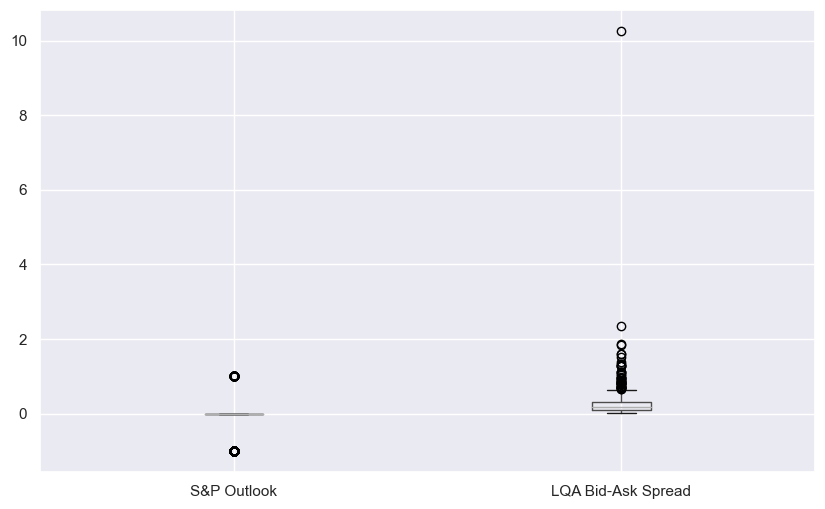

In [197]:
plt.figure(figsize=(10, 6))
df_cleaned.boxplot()
plt.show()

In [164]:
df_cleaned = df_cleaned[df_cleaned["LQA Bid-Ask Spread"] != df_cleaned["LQA Bid-Ask Spread"].max()]

In [183]:
import numpy as np

df_log = df_cleaned.apply(lambda x: np.log1p(x) if np.issubdtype(x.dtype, np.number) else x)

# df_cleaned["Market Cap"] = np.log(df_cleaned["Market Cap"])
# df_cleaned["Market Cap"] = np.log(df_cleaned["Market Cap"])
# df_cleaned = df_cleaned.drop(columns=["LQA Expected Daily Vol"])
# df_cleaned["LQA Expected Daily Vol"] = np.log(df_cleaned["LQA Expected Daily Vol"])

c:\Users\Ayushee\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


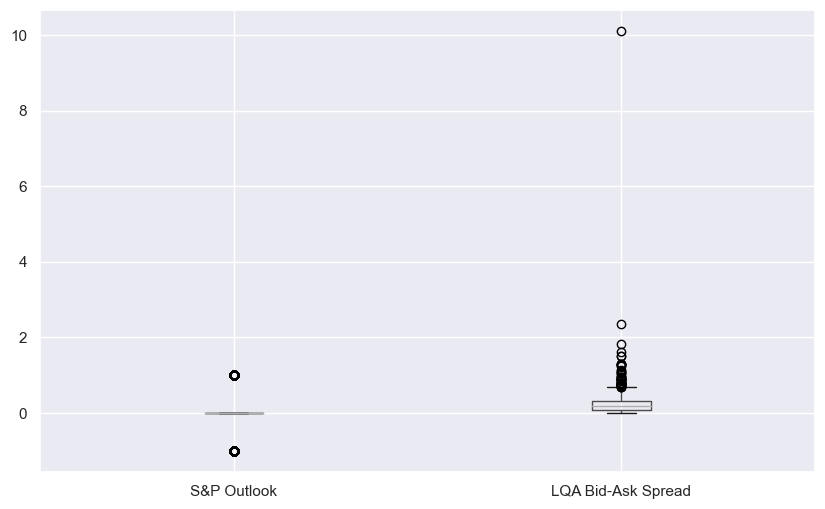

In [184]:
plt.figure(figsize=(10, 6))
df_cleaned.boxplot()
plt.show()

In [199]:
from sklearn.discriminant_analysis import StandardScaler
scaler = StandardScaler()

final_df = df_cleaned.loc[:, ["LQA Bid-Ask Spread", "S&P Outlook", "Yld to Mty (Mid)"]]
X = scaler.fit_transform(final_df)
X

array([[ 0.11099821, -1.62640187,  0.11848456],
       [ 0.12689121, -1.62640187,  0.11179664],
       [ 0.11099821, -1.62640187,  0.11708991],
       ...,
       [ 0.12176188, -1.62640187, -0.08747057],
       [ 0.34204139,  0.27453331,  0.00358443],
       [ 1.69390519,  0.27453331, -0.04098797]])

c:\Users\Ayushee\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Ayushee\AppData\Local\Temp\ipykernel_25088\2089035286.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned["Cluster"] = kmeans.labels_


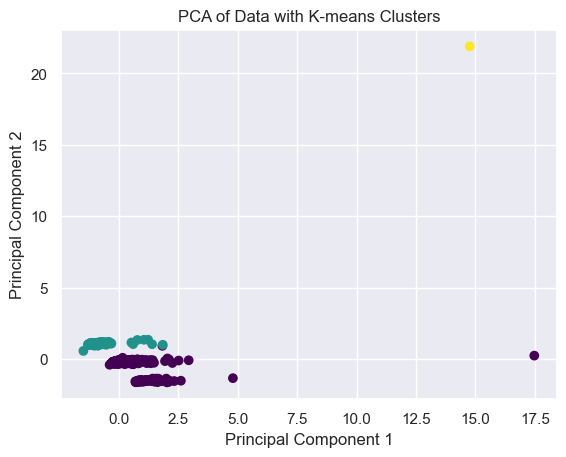

In [200]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
cluster_labels = kmeans.labels_
df_cleaned["Cluster"] = kmeans.labels_

# Apply PCA on the data points (X)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Visualize the k-means clusters in the PCA space
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis')
plt.title("PCA of Data with K-means Clusters")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

In [48]:
cluster_labels

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,

<Axes: xlabel='S&P Outlook', ylabel='LQA Bid-Ask Spread'>

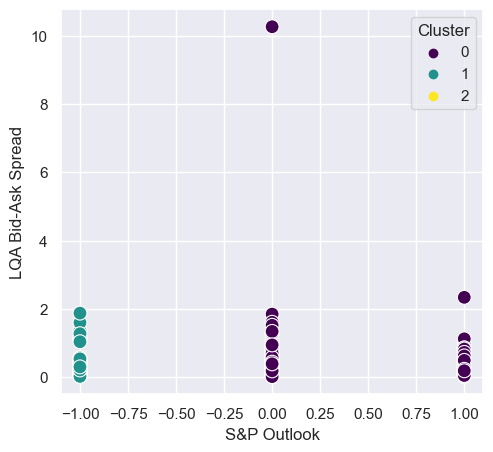

In [201]:
plt.figure(figsize=(12, 5))
plt.subplot(1,2,1)
sns.scatterplot(x='S&P Outlook', y='LQA Bid-Ask Spread', hue='Cluster', data=df_cleaned, palette='viridis', s=100, legend='full')